In [2]:
from tensorflow.keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
from keras.preprocessing import sequence
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 2s 0us/step


In [4]:
def train_model(model, x_train, y_train, epochs=5, batch_size=128, validation_split=0.2):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    return history

In [5]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

In [6]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

In [7]:
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(max_features, 32))
model_bidirectional.add(Bidirectional(SimpleRNN(32)))
model_bidirectional.add(Dense(1, activation='sigmoid'))

In [8]:
model_deep_rnn = Sequential()
model_deep_rnn.add(Embedding(max_features, 32))
model_deep_rnn.add(SimpleRNN(32, return_sequences=True))
model_deep_rnn.add(SimpleRNN(32))
model_deep_rnn.add(Dense(1, activation='sigmoid'))

In [9]:
print("*****Base RNN*****")
history_rnn = train_model(model_rnn, x_train, y_train)
print("*****LSTM*****")
history_lstm = train_model(model_lstm, x_train, y_train)
print("*****Bidirectional RNN*****")
history_bidirectional = train_model(model_bidirectional, x_train, y_train)
print("*****Deep RNN*****")
history_deep_rnn = train_model(model_deep_rnn, x_train, y_train)

*****Base RNN*****
Epoch 1/5
157/157 [==============================] - 99s 608ms/step - loss: 0.6673 - accuracy: 0.5885 - val_loss: 0.6598 - val_accuracy: 0.5970
Epoch 2/5
157/157 [==============================] - 90s 572ms/step - loss: 0.4961 - accuracy: 0.7836 - val_loss: 0.4602 - val_accuracy: 0.7868
Epoch 3/5
157/157 [==============================] - 86s 547ms/step - loss: 0.2838 - accuracy: 0.8880 - val_loss: 0.3784 - val_accuracy: 0.8390
Epoch 4/5
157/157 [==============================] - 82s 519ms/step - loss: 0.1497 - accuracy: 0.9502 - val_loss: 0.4138 - val_accuracy: 0.8332
Epoch 5/5
157/157 [==============================] - 81s 518ms/step - loss: 0.0737 - accuracy: 0.9808 - val_loss: 0.5066 - val_accuracy: 0.8056
*****LSTM*****
Epoch 1/5
157/157 [==============================] - 22s 125ms/step - loss: 0.5303 - accuracy: 0.7448 - val_loss: 0.3502 - val_accuracy: 0.8556
Epoch 2/5
157/157 [==============================] - 17s 111ms/step - loss: 0.2804 - accuracy: 0.8895 

In [10]:
import numpy as np

def evaluate_model(model, x_test, y_test):
    y_pred_prob = model.predict(x_test)
    y_pred = np.round(y_pred_prob).astype(int)

    print("Classification Report:\n", classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

782/782 [==============================] - 51s 64ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80     12500
           1       0.80      0.82      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000

Accuracy: 80.51%


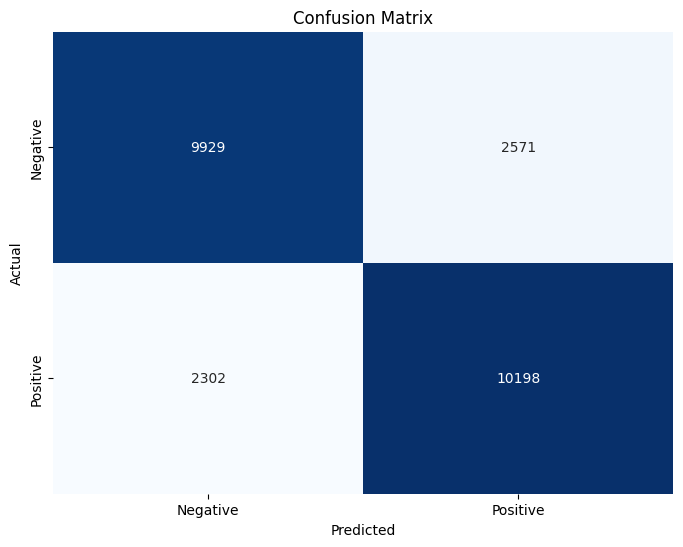

782/782 [==============================] - 7s 8ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Accuracy: 86.89%


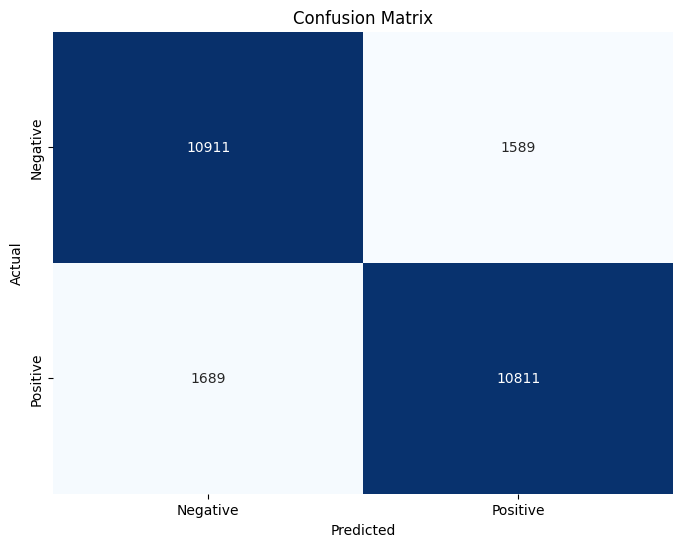

782/782 [==============================] - 68s 86ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84     12500
           1       0.83      0.86      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

Accuracy: 83.97%


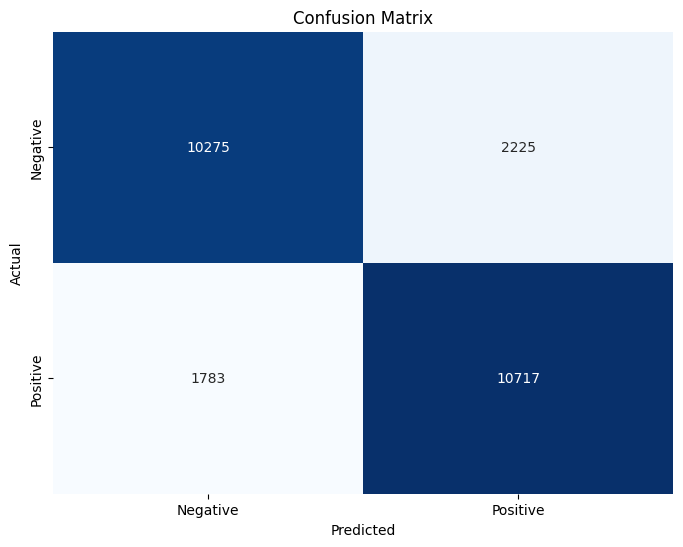

782/782 [==============================] - 71s 90ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     12500
           1       0.82      0.82      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000

Accuracy: 82.18%


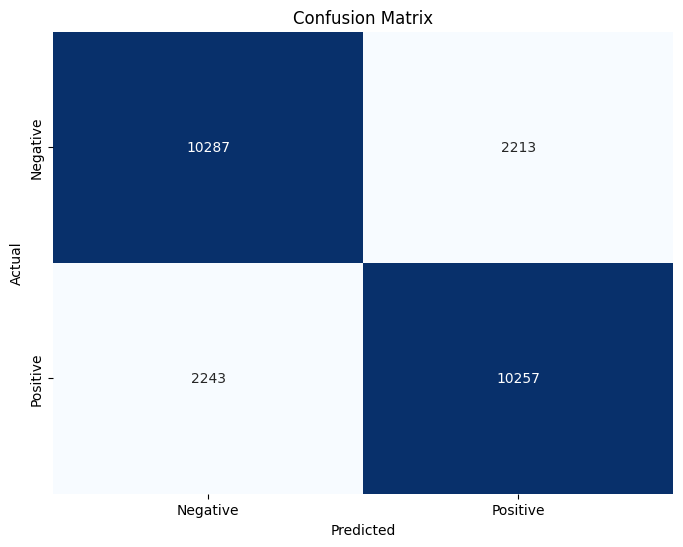

In [11]:
evaluate_model(model_rnn, x_test, y_test)
evaluate_model(model_lstm, x_test, y_test)
evaluate_model(model_bidirectional, x_test, y_test)
evaluate_model(model_deep_rnn, x_test, y_test)

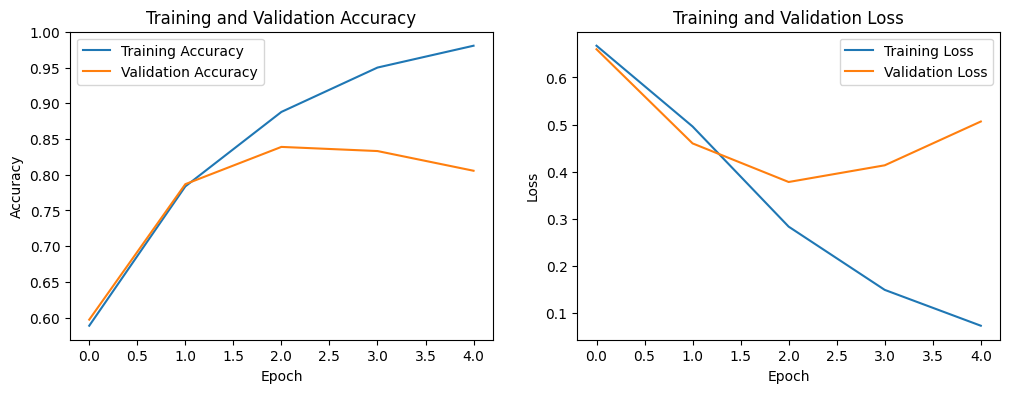

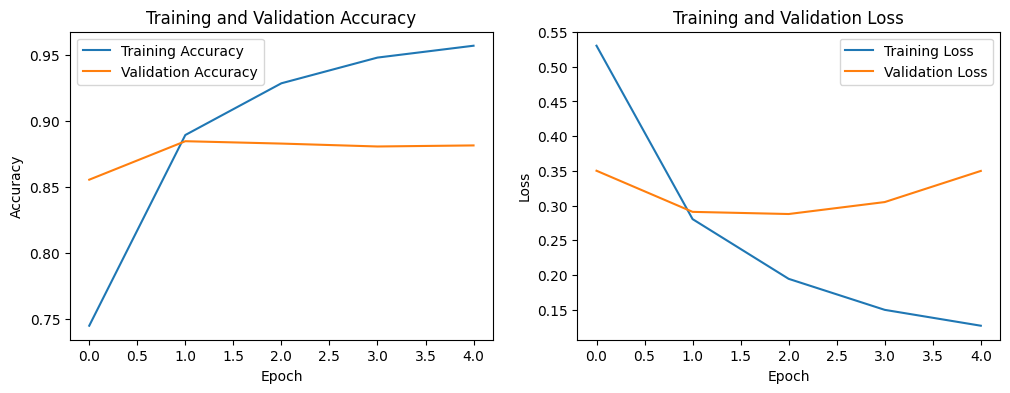

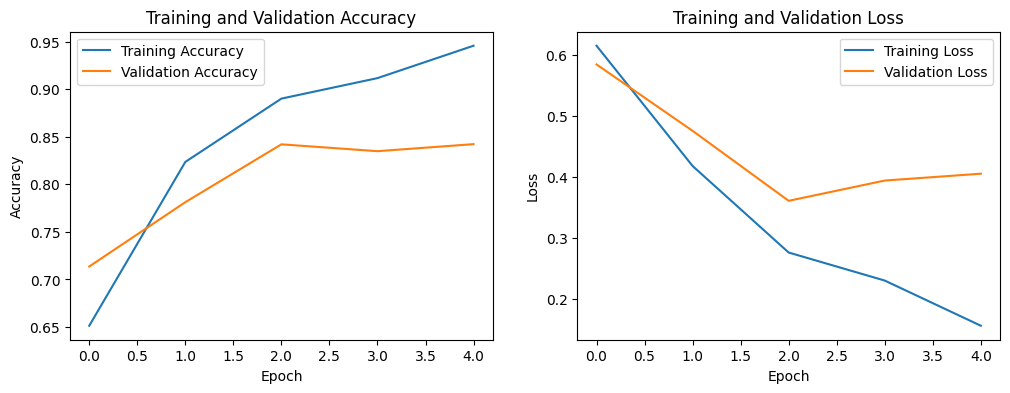

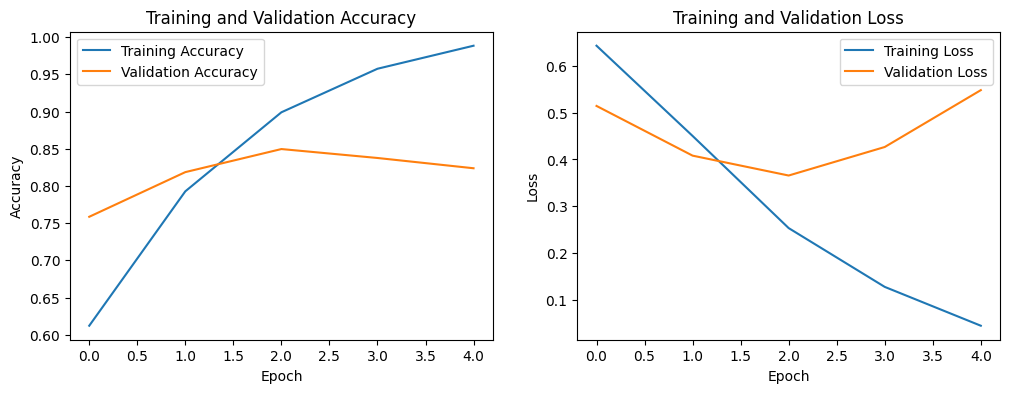

In [12]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Графік точності
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Графік втрат
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
plot_history(history_rnn)
plot_history(history_lstm)
plot_history(history_bidirectional)
plot_history(history_deep_rnn)

In [13]:
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(x_test, y_test)
print(f'Test accuracy for RNN model: {test_acc_rnn}')

test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test, y_test)
print(f'Test accuracy for LSTM model: {test_acc_lstm}')

test_loss_bidirectional, test_acc_bidirectional = model_bidirectional.evaluate(x_test, y_test)
print(f'Test accuracy for Bidirectional model: {test_acc_bidirectional}')

test_loss_deep_rnn, test_acc_deep_rnn = model_deep_rnn.evaluate(x_test, y_test)
print(f'Test accuracy for Deep RNN model: {test_acc_deep_rnn}')

782/782 [==============================] - 36s 46ms/step - loss: 0.5074 - accuracy: 0.8051
Test accuracy for RNN model: 0.805079996585846
782/782 [==============================] - 7s 9ms/step - loss: 0.3815 - accuracy: 0.8689
Test accuracy for LSTM model: 0.8688799738883972
782/782 [==============================] - 67s 85ms/step - loss: 0.4012 - accuracy: 0.8397
Test accuracy for Bidirectional model: 0.839680016040802
782/782 [==============================] - 70s 90ms/step - loss: 0.5635 - accuracy: 0.8218
Test accuracy for Deep RNN model: 0.8217599987983704
